# Cost Analysis of the Installation of Solar Panels

### First, let's have a look at our status quo.

To get a realistic idea of our power usage, let's pull in our report from NB Power.

![alt text](nbpower.png "NB Power")

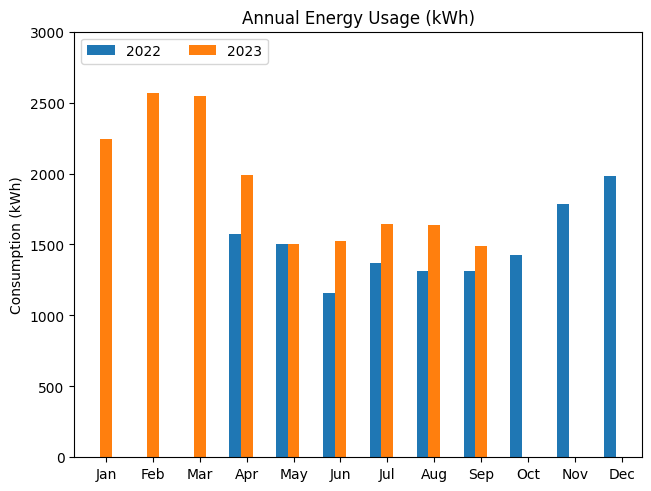


We consume, on average, 1,699 kWh per month, which is approximately 20,384 kWh per year. The above graph shows our month energy consumption from the past two years. While there is not a lot of data upon which we can base a tend, it looks like consumption increasing. Perhaps the increase was related to the weather and an increased use of air conditioning?



In [1]:

import datetime as dt
from statistics import mean

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from amortization.amount import calculate_amortization_amount

# read in the report from NB Power; gets imported as a dataframe
usage_df_nbp = pd.read_excel("NBPowerReport.xlsx")
usage_df_nbp.rename(columns={"Month": "Date"}, inplace=True)
# Let's add a new column called year and another called month
usage_df_nbp["Year"] = usage_df_nbp["Date"].apply(lambda x: x.year)
usage_df_nbp["Month"] = usage_df_nbp["Date"].apply(lambda x: x.strftime("%b"))
usage_df_nbp.sort_values("Date", inplace=True)
usage_df_nbp.drop(["Diff.", "Billing Days", "Avg Daily kWh", "Diff..1"], axis=1, inplace=True)
months = usage_df_nbp["Month"].unique()
months = sorted(months, key=lambda x: dt.datetime.strptime(x, "%b"))
years = usage_df_nbp["Year"].unique()
years.sort()

usage_df = pd.DataFrame(index=months)
for year in years:
    monthly_usage = list()
    for month in months:
        mask = (usage_df_nbp["Year"] == year) & (usage_df_nbp["Month"] == month)
        tmp_df = usage_df_nbp.where(mask).dropna()
        usage = tmp_df["kWh Used"].iloc[0] if tmp_df.shape[0] else np.NAN
        monthly_usage.append(usage)
    usage_df[year] = monthly_usage

x = np.arange(len(months))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
for year in years:
    y = usage_df[year]
    offset = width * multiplier
    rects = ax.bar(x + offset, y, width, label=str(year))
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Consumption (kWh)')
ax.set_title('Annual Energy Usage (kWh)')
ax.set_xticks(x + width, months)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 3000)
plt.show()

# Monthly average energy consumption
usage_mean_monthly = usage_df_nbp["kWh Used"].mean()
# Average consumption per year
usage_mean_yearly = usage_mean_monthly * 12
print(f"""
We consume, on average, {round(usage_mean_monthly):,} kWh per month, which is approximately {round(usage_mean_yearly):,} kWh per year. The above graph shows our month energy consumption from the past two years. While there is not a lot of data upon which we can base a tend, it looks like consumption increasing. Perhaps the increase was related to the weather and an increased use of air conditioning?
""")

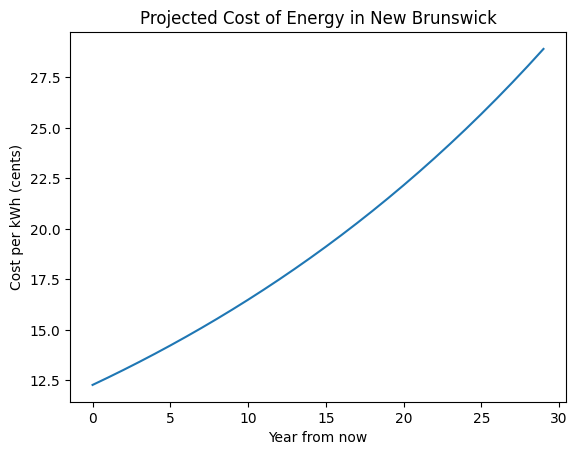


The current rates with NB Power are $0.12/kWh. In 30 years, assuming an annual increase of 3%, we would be looking at about $0.29/kWh. The rate of annual increase used is a conservative estimate.



In [2]:
# we will use the standard conservative assumption that there will be a 3% increase of electricity per year
current_rate = 12.27  # cents
annual_increase = 0.03
timespan = 30  # years
annual_rates = [current_rate]
for i in range(0, timespan - 1):
    annual_rates.append(annual_rates[-1] * (1 + annual_increase))

# plot
x = np.arange(timespan)
y = annual_rates
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_ylabel('Cost per kWh (cents)')
ax.set_xlabel('Year from now')
ax.set_title('Projected Cost of Energy in New Brunswick')
plt.show()

print(f"""
The current rates with NB Power are ${round(y[0] / 100, 2)}/kWh. In {timespan} years, assuming an annual increase of {annual_increase:.0%}, we would be looking at about ${round(y[-1] / 100, 2)}/kWh. The rate of annual increase used is a conservative estimate.
""")


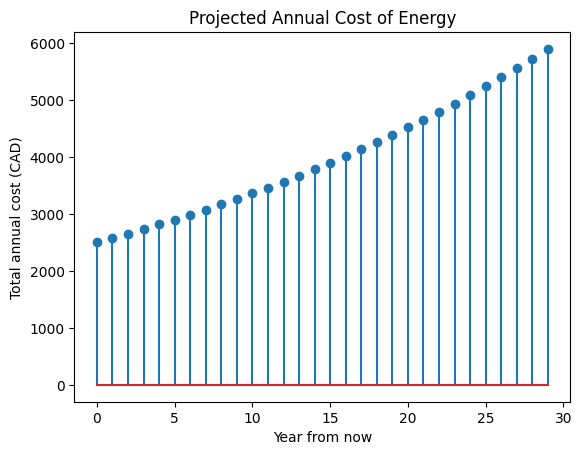


        Over a 30 year period, we can expect to spend approximately $118,992 on electricity. This is represented by the sum of the vertical lines in the above graph. Wow!



In [3]:
# So then, how much are we expecting to pay in utilities over this same time period?
# WORKING ASSUMPTION: energy consumption will not change over the same period

# plot
x = np.arange(timespan)
y = np.array(annual_rates) / 100 * usage_mean_yearly
fig, ax = plt.subplots()
ax.stem(x, y)
ax.set_ylabel('Total annual cost (CAD)')
ax.set_xlabel('Year from now')
ax.set_title('Projected Annual Cost of Energy')
plt.show()

# Total amount spent on energy over timespan?
annual_costs_for_timespan = y
expected_cost_for_timespan = annual_costs_for_timespan.sum()
print(f"""
        Over a {timespan} year period, we can expect to spend approximately ${round(expected_cost_for_timespan):,} on electricity. This is represented by the sum of the vertical lines in the above graph. Wow!
""")

# OK so that gives us the picture of the status quo... How do things change if we installed solar?

### The figures below are based on a quote from a company called Sunly who did a site visit.
![alt text](sunly.png )

They are proposing installing 30 x 400w solar panels on our roof, as shown below.

![alt text](ourhouse.png )





In [4]:
system_rating = 30 * (400 / 1000)  # Sunly quoted for 30 x 400 w panels = 12 kw system
avg_sunlight_per_day = 3  # hours
annual_production_estimate_david = system_rating * 3 * 365  # kwh
annual_production_estimate = 11871  # kwh as a conservative estimate
print(f"""
Let's do a quick sanity check... If we do a quick back-of-the-napkin calculation, we can come up with our own estimate of annual energy generation which can be compared to what they are telling us is possible / realistic. 

If we are installing a {round(system_rating)} kw (30 x 400w) system and if we assume that on average we'll get around {avg_sunlight_per_day} hours/day of sunlight, this gives us roughly {round(annual_production_estimate_david):,} kWh/year. Therefore, their estimate of {round(annual_production_estimate):,} kWh/year really does seem to be a conservative one. If we can on average less than {avg_sunlight_per_day} hours of sunlight/day, I don't want to know.
""")


Let's do a quick sanity check... If we do a quick back-of-the-napkin calculation, we can come up with our own estimate of annual energy generation which can be compared to what they are telling us is possible / realistic. 

If we are installing a 12 kw (30 x 400w) system and if we assume that on average we'll get around 3 hours/day of sunlight, this gives us roughly 13,140 kWh/year. Therefore, their estimate of 11,871 kWh/year really does seem to be a conservative one. If we can on average less than 3 hours of sunlight/day, I don't want to know.




The base price of the installation has been quoted at $36,294. We will have to conduct an energy audit which will cost $300. If ever we need to repair the roof, the panel will have to be unmounted and remounted and this will cost approximately $5,000.

A few rebates might be available. If we sign up before Oct. 31, we would be receive a rebate of $1,000. Through the NB Power Total Homes program, we are looking at a rebate of up to $2,400. 

Based on the above, we can describe three scenarios: worst, base and best. 



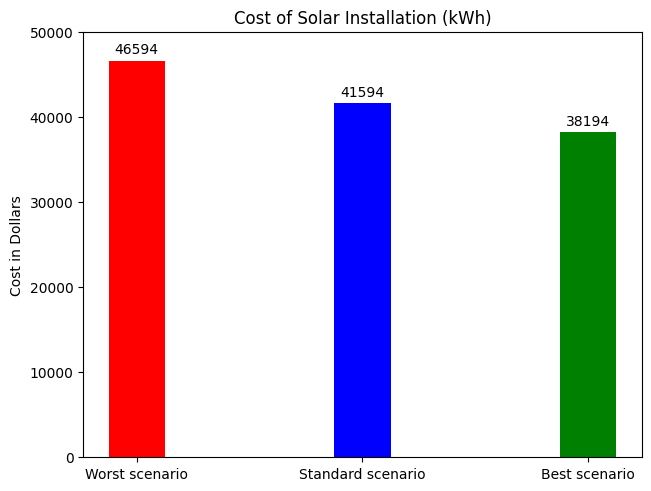

In [5]:
# what is the cost of the system?
base_cost_installation_cost = 36294.00  # includes taxes 
cost_of_energy_audit = 300
cost_of_roof_repair = 5000  # only the cost to move the panels
pre_halloween_discount = -1000
total_home_credit = -2400

standard_scenario = base_cost_installation_cost + cost_of_energy_audit + cost_of_roof_repair
worst_scenario = standard_scenario + cost_of_roof_repair
best_scenario = standard_scenario + pre_halloween_discount + total_home_credit
mean_scenario = mean([standard_scenario, worst_scenario, best_scenario])

print(f"""
The base price of the installation has been quoted at ${round(base_cost_installation_cost):,}. We will have to conduct an energy audit which will cost ${round(cost_of_energy_audit):,}. If ever we need to repair the roof, the panel will have to be unmounted and remounted and this will cost approximately ${round(cost_of_roof_repair):,}.

A few rebates might be available. If we sign up before Oct. 31, we would be receive a rebate of ${abs(pre_halloween_discount):,}. Through the NB Power Total Homes program, we are looking at a rebate of up to ${abs(total_home_credit):,}. 

Based on the above, we can describe three scenarios: worst, base and best. 
""")

fig, ax = plt.subplots(layout='constrained')
x = np.arange(3)
y = [worst_scenario, standard_scenario, best_scenario]
rects = ax.bar(x, y, width, color=["r","b","g"])
ax.bar_label(rects, padding=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost in Dollars')
ax.set_title('Cost of Solar Installation (kWh)')
ax.set_xticks(x, ["Worst scenario", "Standard scenario", "Best scenario"])
# ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 50000)
plt.show()



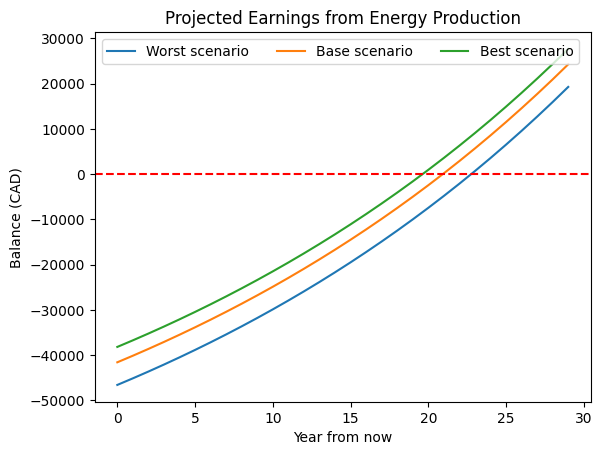

,Worst scenario,Base scenario,Best scenario,Year
17,-14896.687147,-9896.687147,-6496.687147,2040
18,-12489.196062,-7489.196062,-4089.196062,2041
19,-10009.480244,-5009.480244,-1609.480244,2042
20,-7455.372951,-2455.372951,944.627049,2043
21,-4824.642439,175.357561,3575.357561,2044


In [6]:
# Given the above, how many years until we break even? 
# WORKING ASSUMPTION: rate of electricity generation will remain steady ove the timespan

current = 0 - worst_scenario
annual_balance_worst = [current]
for i in range(0, timespan - 1):
    earning = annual_production_estimate * annual_rates[i] / 100
    current += earning
    annual_balance_worst.append(current)

current = 0 - standard_scenario
annual_balance_base = [current]
for i in range(0, timespan - 1):
    earning = annual_production_estimate * annual_rates[i] / 100
    current += earning
    annual_balance_base.append(current)
    
current = 0 - best_scenario
annual_balance_best = [current]
for i in range(0, timespan - 1):
    earning = annual_production_estimate * annual_rates[i] / 100
    current += earning
    annual_balance_best.append(current)

balance_df = pd.DataFrame(index=np.arange(timespan), data={
    "Worst scenario": annual_balance_worst,
    "Base scenario": annual_balance_base,
    "Best scenario": annual_balance_best,
})
now = dt.datetime.now()
balance_df["Year"]=balance_df.apply(lambda x: x.name+now.year, axis=1)

# plot
x = np.arange(timespan)
fig, ax = plt.subplots()
for scenario in ["Worst scenario","Base scenario","Best scenario"]:
    ax.plot(x, balance_df[scenario], label=scenario)
ax.set_ylabel('Balance (CAD)')
ax.set_xlabel('Year from now')
ax.set_title('Projected Earnings from Energy Production')
plt.axhline(y=0, color='r', linestyle='dashed')
ax.legend(loc='upper left', ncols=3)
plt.show()
balance_df.iloc[17:22,:]

In the graph above, the break-even point for each scenario is where the curve crosses the x-axis.

In the basic scenario, we can expect to break-even after 19 years. The worst-case scenario, sets us back one year and the best-case scenario breaks even after 17 years. 

**An important assumption in the above projections is that energy production remains constant over the timespan.**

How would a solar installation change the cost of energy for our household?


        Earlier we determined that over a 30 year period, we can expect to spend approximately $118,992 on electricity.  What are the new projections?



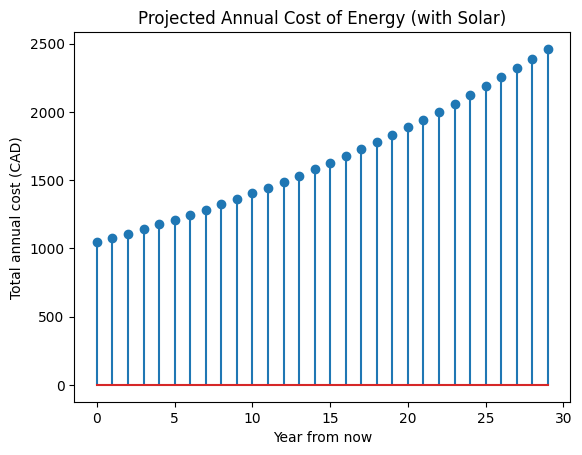


        With the expected energy production of 11,871 kWh, we can expect to spend approximately $49,695 on electricity over the same 30 year period. 



In [7]:
# How would this change the cost of energy?
print(f"""
        Earlier we determined that over a {timespan} year period, we can expect to spend approximately ${round(expected_cost_for_timespan):,} on electricity.  What are the new projections?
""")

# plot
x = np.arange(timespan)
y = np.array(annual_rates) / 100 * (usage_mean_yearly - annual_production_estimate)
fig, ax = plt.subplots()
ax.stem(x, y)
ax.set_ylabel('Total annual cost (CAD)')
ax.set_xlabel('Year from now')
ax.set_title('Projected Annual Cost of Energy (with Solar)')
plt.show()
# Total amount spent on energy over timespan?
new_annual_costs_for_timespan = y
new_expected_cost_for_timespan = new_annual_costs_for_timespan.sum()

print(f"""
        With the expected energy production of {annual_production_estimate:,} kWh, we can expect to spend approximately ${round(new_expected_cost_for_timespan):,} on electricity over the same {timespan} year period. 
""")

In [8]:
# everything is coming together...
savings = expected_cost_for_timespan - (new_expected_cost_for_timespan + mean_scenario)
print(f"""
So by installing a solar system, there is a potential for approximately ${round(savings):,} of savings over a {timespan} year period. Instead of ${round(expected_cost_for_timespan):,}, we would only be paying ${round(new_expected_cost_for_timespan):,}, plus the cost of the investment (we'll use ${round(mean_scenario):,}). This estimate of savings is corroborated by the graph above, showing projected earnings from energy production.
""")


So by installing a solar system, there is a potential for approximately $27,170 of savings over a 30 year period. Instead of $118,992, we would only be paying $49,695, plus the cost of the investment (we'll use $42,127). This estimate of savings is corroborated by the graph above, showing projected earnings from energy production.



Finally, it would be nice to look at what this project would do to our monthly cash flow. 

Specifically, what would happen to our monthly payments on energy if we went ahead with this. The assumption is that we would finance the purchase over 10 years through the Canadian Greener Homes program which offers zero percent loans for up to $40K.

![image](canada.png)


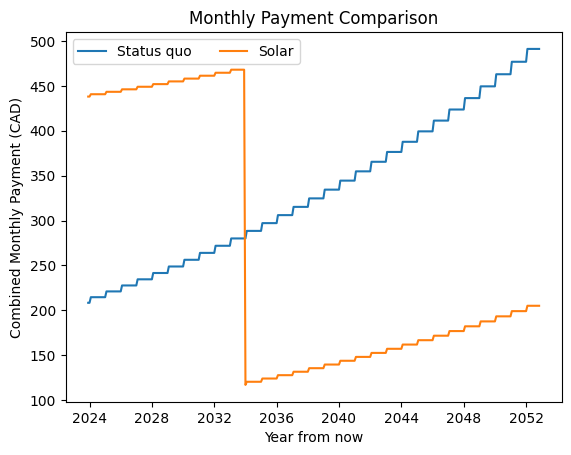


Assuming an annual interest rate of 0% and an amortization period of 120 months (10 x 12 months), we are looking at a monthly payment of $351. This effectively doubles our monthly energy payments for about 10 years, after which, the price will fall dramatically to a small fraction of the status quo. 



In [9]:
start = dt.datetime.now()
end = start + dt.timedelta(days=365 * 29)
periods = pd.date_range(start, end, freq="M")

df_a = pd.DataFrame(data={"period": periods, "loan_payment": np.zeros(periods.__len__()), "nb_power_payment": np.zeros(periods.__len__())})
rates_mapper = {i + start.year: annual_costs_for_timespan[i] / 12 for i in range(0, timespan)}
df_a["nb_power_payment"] = df_a["period"].apply(lambda x: rates_mapper[x.year])
df_a["total_payment"] = df_a.apply(lambda x: x["nb_power_payment"] + x["loan_payment"], axis=1)

df_b = pd.DataFrame(data={"period": periods, "loan_payment": np.zeros(periods.__len__()), "nb_power_payment": np.zeros(periods.__len__())})
rates_mapper = {i + start.year: new_annual_costs_for_timespan[i] / 12 for i in range(0, timespan)}
df_b["nb_power_payment"] = df_b["period"].apply(lambda x: rates_mapper[x.year])
pmt = calculate_amortization_amount(mean_scenario, 0.000001, 120)
df_b.loc[:120, "loan_payment"] = pmt
df_b["total_payment"] = df_b.apply(lambda x: x["nb_power_payment"] + x["loan_payment"], axis=1)

fig, ax = plt.subplots()
ax.plot(df_a["period"], df_a["total_payment"], label="Status quo")
ax.plot(df_b["period"], df_b["total_payment"], label="Solar")
ax.set_ylabel('Combined Monthly Payment (CAD)')
ax.set_xlabel('Year from now')
ax.set_title('Monthly Payment Comparison')
ax.legend(loc='upper left', ncols=3)

plt.show()
print(f"""
Assuming an annual interest rate of 0% and an amortization period of 120 months (10 x 12 months), we are looking at a monthly payment of ${round(pmt):,}. This effectively doubles our monthly energy payments for about 10 years, after which, the price will fall dramatically to a small fraction of the status quo. 
""")
